# Simple Linear Regression (SLR)

Suppose you're asked whether or not a patient's age increases their chances of a myocardial infarction (heart attack). An ecologist asks you how tree density (trees per square mile) are associated with the number of deer in a county. A stock broker, looking to capitalize on their investment, asks you to relate historical stock price data to predict future prices.

All of these examples relate one random variable to a set of others. Questions like this can begin to be answered with **regression**

### Probabilistic and model form
**Simple Linear Regression** supposes a conditional probability between one random variable (denoted $Y$) and another (denoted $X$) as 

$$
p(Y=y|X=x) \sim N(\beta_{0} + x*\beta_{1},\sigma^2)
$$

The conditional probability of $Y$ is linearly related to $X$ with two parameters: an intercept $(\beta_{0})$ and a slope $(\beta_{1})$.

When we write a regression model in terms of a single, or in more complex cass many, probability distributions, it is called **probabilistic form**.
Probabilsitic form highlights the distribution of our variable of interest ($Y$). 

Another common way to write our this relationship is 

\begin{align}
    y     &= \beta_{0} + x*\beta_{1}+\epsilon\\
 \epsilon &\sim N(0,\sigma^{2})
\end{align}

This is called **model form** for SLR.
Model form highlights the relationship between $Y$ and $X$, focusing less on the distribution of $Y$.

### LINE assumptions and plotting

Lets assume we collected daya on our two random varianles $X$ and $Y$, and arranged them in a dataset 

$$
    \mathcal{D} = \left [ \begin{array}{cc}
                            X & Y\\
                            \hline
                            x_{1}  & y_{1}  \\
                            x_{2}  & y_{2}  \\
                            x_{3}  & y_{3}  \\
                            \vdots & \vdots \\
                            x_{N}  & y_{N}
                            \end{array} \right ]
$$


SLR makes a set of assumptions usually called the "LINE" assumpions: 

* L - Our response ($Y$) is linearly related to $X$.
* I - The observations $(y_{i},x_{i})$ are independent from one another.
* N - The conditional probability of our response $y$ is normally distributed.
* E - The same $\sigma$ applies to all values of $X$, i.e. and distribution of errors have equal variance.

With a scatter plot we can investigate linearaity and see how the normal dist and "same sigma" assumptions fit with the sample we collected.

### Data and scatterplot

[The California Department of Public Health, Center for Healthcare Quality collected COVID-19 cases data](https://healthdata.gov/dataset/covid-19-skilled-nursing-facility-data) on the number of residents and healthcare workers at skilled nursing facilities (SNFs), and made this data available to the public for analysis. 
The dataset is on the facility level, recording the total number of health care workers who were infected with COVID-19 and the total number of residents at SNFs who were infected with COVID-19. 

The data is collected over time and we can look at data as of 2020-10-31.
Below we will build a scatter plot of the total number of cases among health workers versus the total number of cases among residents.

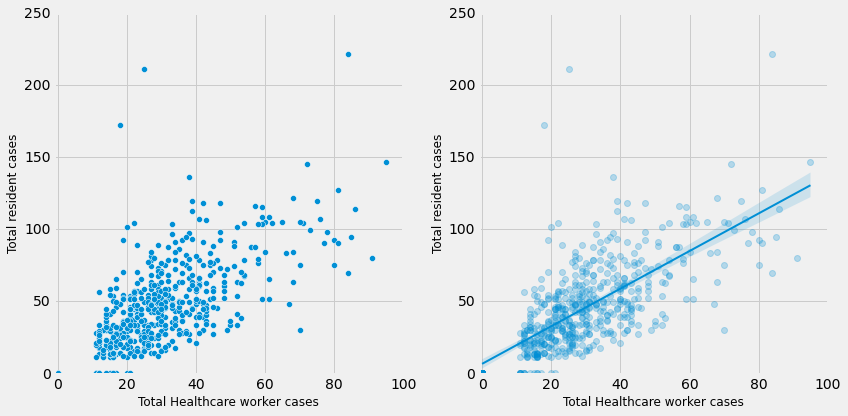

In [21]:
import pandas as pd
d = pd.read_csv("https://data.chhs.ca.gov/dataset/7759311f-1aa8-4ff6-bfbb-ba8f64290ae2/resource/d4d68f74-9176-4969-9f07-1546d81db5a7/download/covid19datanursinghome.csv")

dataAsOf20201031 = d.loc[d.as_of_date=="2020-10-31",:]

plt.style.use("fivethirtyeight")
fig,axs = plt.subplots(1,2)

ax=axs[0]
sns.scatterplot( x="total_health_care_worker_cases"
                ,y="total_resident_cases"
                ,data=dataAsOf20201031
                ,ax=ax)
ax.set_xlabel("Total Healthcare worker cases", fontsize=12)
ax.set_ylabel("Total resident cases", fontsize=12)

ax.set_xlim(-1,100)
ax.set_ylim(-1,250)


ax=axs[1]
sns.regplot( x="total_health_care_worker_cases"
                ,y="total_resident_cases"
                ,data=dataAsOf20201031
                ,ax=ax
                ,scatter_kws={"alpha":0.25}
                ,line_kws={"lw":2}
           )
ax.set_xlabel("Total Healthcare worker cases", fontsize=12)
ax.set_ylabel("Total resident cases", fontsize=12)

ax.set_xlim(-1,100)
ax.set_ylim(-1,250)

fig.set_size_inches(12,6)
fig.set_tight_layout(True)

### Least Squares and finding optimal parameters


To express the relationship between two random variables $X$ and $Y$ using linear regression, we need to compute three parameters: $\beta_{0}$,$\beta_{1}$, and $\sigma$. 
But how do we choose the most appropriate paramters?

### $\beta_{0}$ and $\beta_{1}$

We would like to find parameters $\beta_{0}$ (the intercept) and $\beta_{1}$ (the slope) so that they are, in some sense, optimal. 
There are many different ways to define optimal. 
The most common method to define an optimal $\beta_{0}$ and $\beta_{1}$ for linear regression is least squares.

Given $N$ pairs $(x_{i},y_{i})$, a solution to the least squares equation is the pair $(\beta_{0},\beta_{1})$ such that

\begin{align}
    L(\beta_{0},\beta_{1}) = N^{-1} \sum_{i=1}^{N} \left( y_{i} - \left[ \beta_{0} + \beta_{1}x_{i} \right]  \right)^{2}
\end{align}

We want to find $\beta_{0}$ and $\beta_{1}$ so that the squared **vertical** distance between any pair $(x_{i},y_{i})$ and our line is minimized on average. 

Traditionally we would find the optimal $\beta$s by computing the derivative of $L$ with respect to $\beta_{0}$ and the derivative of $L$ with respect to $\beta_{1}$, setting these two equations equal to zero and solving for $\beta_{0}$ and $\beta_{1}$. These techniques are beyond the scope of PHDS-I. 

We can gain intuition for how to find these parameters by looking at the function $L$ for different parameter values $\beta_{0}$ and $\beta_{1}$. 

Text(0, 0.5, 'L')

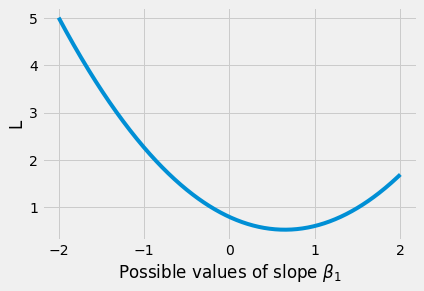

In [17]:
import numpy as np 

def L(xs,ys,b0,b1):
    L = 0
    N = len(xs)
    for (x,y) in zip(xs,ys):
        L+= ( y - (b0+b1*x) )**2 
        N+=1
    return  L / N

b0 = 2.0
b1 = 0.5
xs = np.random.normal(0,1,100)
ys = b0 + xs*b1 +np.random.normal(0,1,100)
    
b1s = np.linspace(-2,2.,500)
Ls = []

for b in b1s:
    Ls.append( L(xs,ys, b0, b) )

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()
ax.plot(b1s,Ls)

ax.set_xlabel(r"Possible values of slope $\beta_{1}$")
ax.set_ylabel(r"L")

The optimal $\beta_{0}$ and $\beta_{1}$---the parameter values that minimize $L$---are

\begin{align}
    \beta_{0} &= \\
    \beta_{1} &= \\
\end{align}

### Inference (tests and CIS)